## Clusterização K-Means para agrupar elementos de histogramas de cores
***

Neste caso iremos criar um descritor de imagens usando um histograma de cores, aplicando algoritmos de machine learning (k-means)

Histograma de cores nada mais é que a distribuição de pixels ao longo da imagem. Um pixel que aparece com muita frequência mostra que eu tenho uma intensidade naquele pixel.

Vou extrair o histograma de cores, apresentar esses vetores de recursos a um algoritmo de machine learning de clusterização (k-means) e ele vai encontrar quais são os padrões daqueles pixels. Ou seja, vai agrupar as imagens em grupos diferentes. No exemplo abaixo será grupos de carros e elefantes.

Na prática ele não compara as imagens, ele verifica se a organização de cores daquela imagem é similar a uma outra imagem.

***

In [1]:
# Imports
import numpy as np
import cv2
from sklearn.cluster import KMeans
from imutils import paths
from matplotlib import pyplot as plt


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
class Histograma(object):
    """
    Histograma de cores
    """

    def __init__(self, bins):
        """
        Construtor
        """

        # Armazena o número de bins (colunas dos histogramas) no Histograma
        self.bins = bins

    def describe(self, image, mask=None):
        """
        Converte a imagem para o espaço de cor L*a*b*, calcula um histograma e normaliza.       
        """

        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

        # Como mencionado no módulo Iluminação e espaços de cores, a distância euclidiana
        # entre duas cores no L*a*b* tem um significado perceptivo e notável. E uma vez que
        # o algoritmo de agrupamento k-means assume um espaço euclidiano, obteremos melhores
        # clusters usando o espaço de cores L*a*b* do que RGB ou HSV.
        hist = cv2.calcHist([lab], [0, 1, 2], mask, self.bins, [0, 256, 0, 256, 0, 256])

        # É muito importante que executemos este passo de normalização. 
        # Se não o fizéssemos, as imagens com exatamente o mesmo conteúdo, mas tamanhos diferentes, 
        # teriam histogramas dramaticamente diferentes. Em vez disso, ao normalizar o nosso histograma, 
        # garantimos que a largura e a altura da nossa imagem de entrada não tenham efeito no histograma de saída.
        hist = cv2.normalize(hist, hist).flatten()

        # Retorna o histograma
        return hist

In [3]:
# Inicializa o descritor de imagem juntamente com a matriz de imagem
# Como descritores de imagem, os histogramas de cores tendem a ser bastante poderosos. 
# Se decidimos utilizar um histograma de cores 3D com 8 bins por canal, poderíamos representar 
# qualquer imagem de qualquer tamanho usando apenas 8 x 8 x 8 = 512 bins, ou um vetor de características de 512-d. 
# O tamanho de uma imagem não tem efeito em nosso histograma de cores de saída - embora seja sábio redimensionar 
# imagens grandes para dimensões mais gerenciáveis para aumentar a velocidade do cálculo do histograma.
desc = Histograma([8, 8, 8])
data = []

In [4]:
# Obtém os caminhos da imagem a partir do diretório do conjunto de dados
imagePaths = list(paths.list_images("./imagens/dataset01"))
imagePaths = np.array(sorted(imagePaths))
print(imagePaths)

['./imagens/dataset01/car01.jpeg' './imagens/dataset01/car02.jpg'
 './imagens/dataset01/car03.jpg' './imagens/dataset01/elefante01.jpg'
 './imagens/dataset01/elefante02.jpg' './imagens/dataset01/elefante03.jpg']


In [5]:
# Loop sobre o conjunto de dados de entrada de imagens
for imagePath in imagePaths:
    # Carrega a imagem, descreve a imagem e, em seguida, atualizar a lista de dados
    image = cv2.imread(imagePath)
    hist = desc.describe(image)
    data.append(hist)

In [6]:
# Agrupa os histogramas de cores
clt = KMeans(n_clusters = 2, random_state = 42)
labels = clt.fit_predict(data)

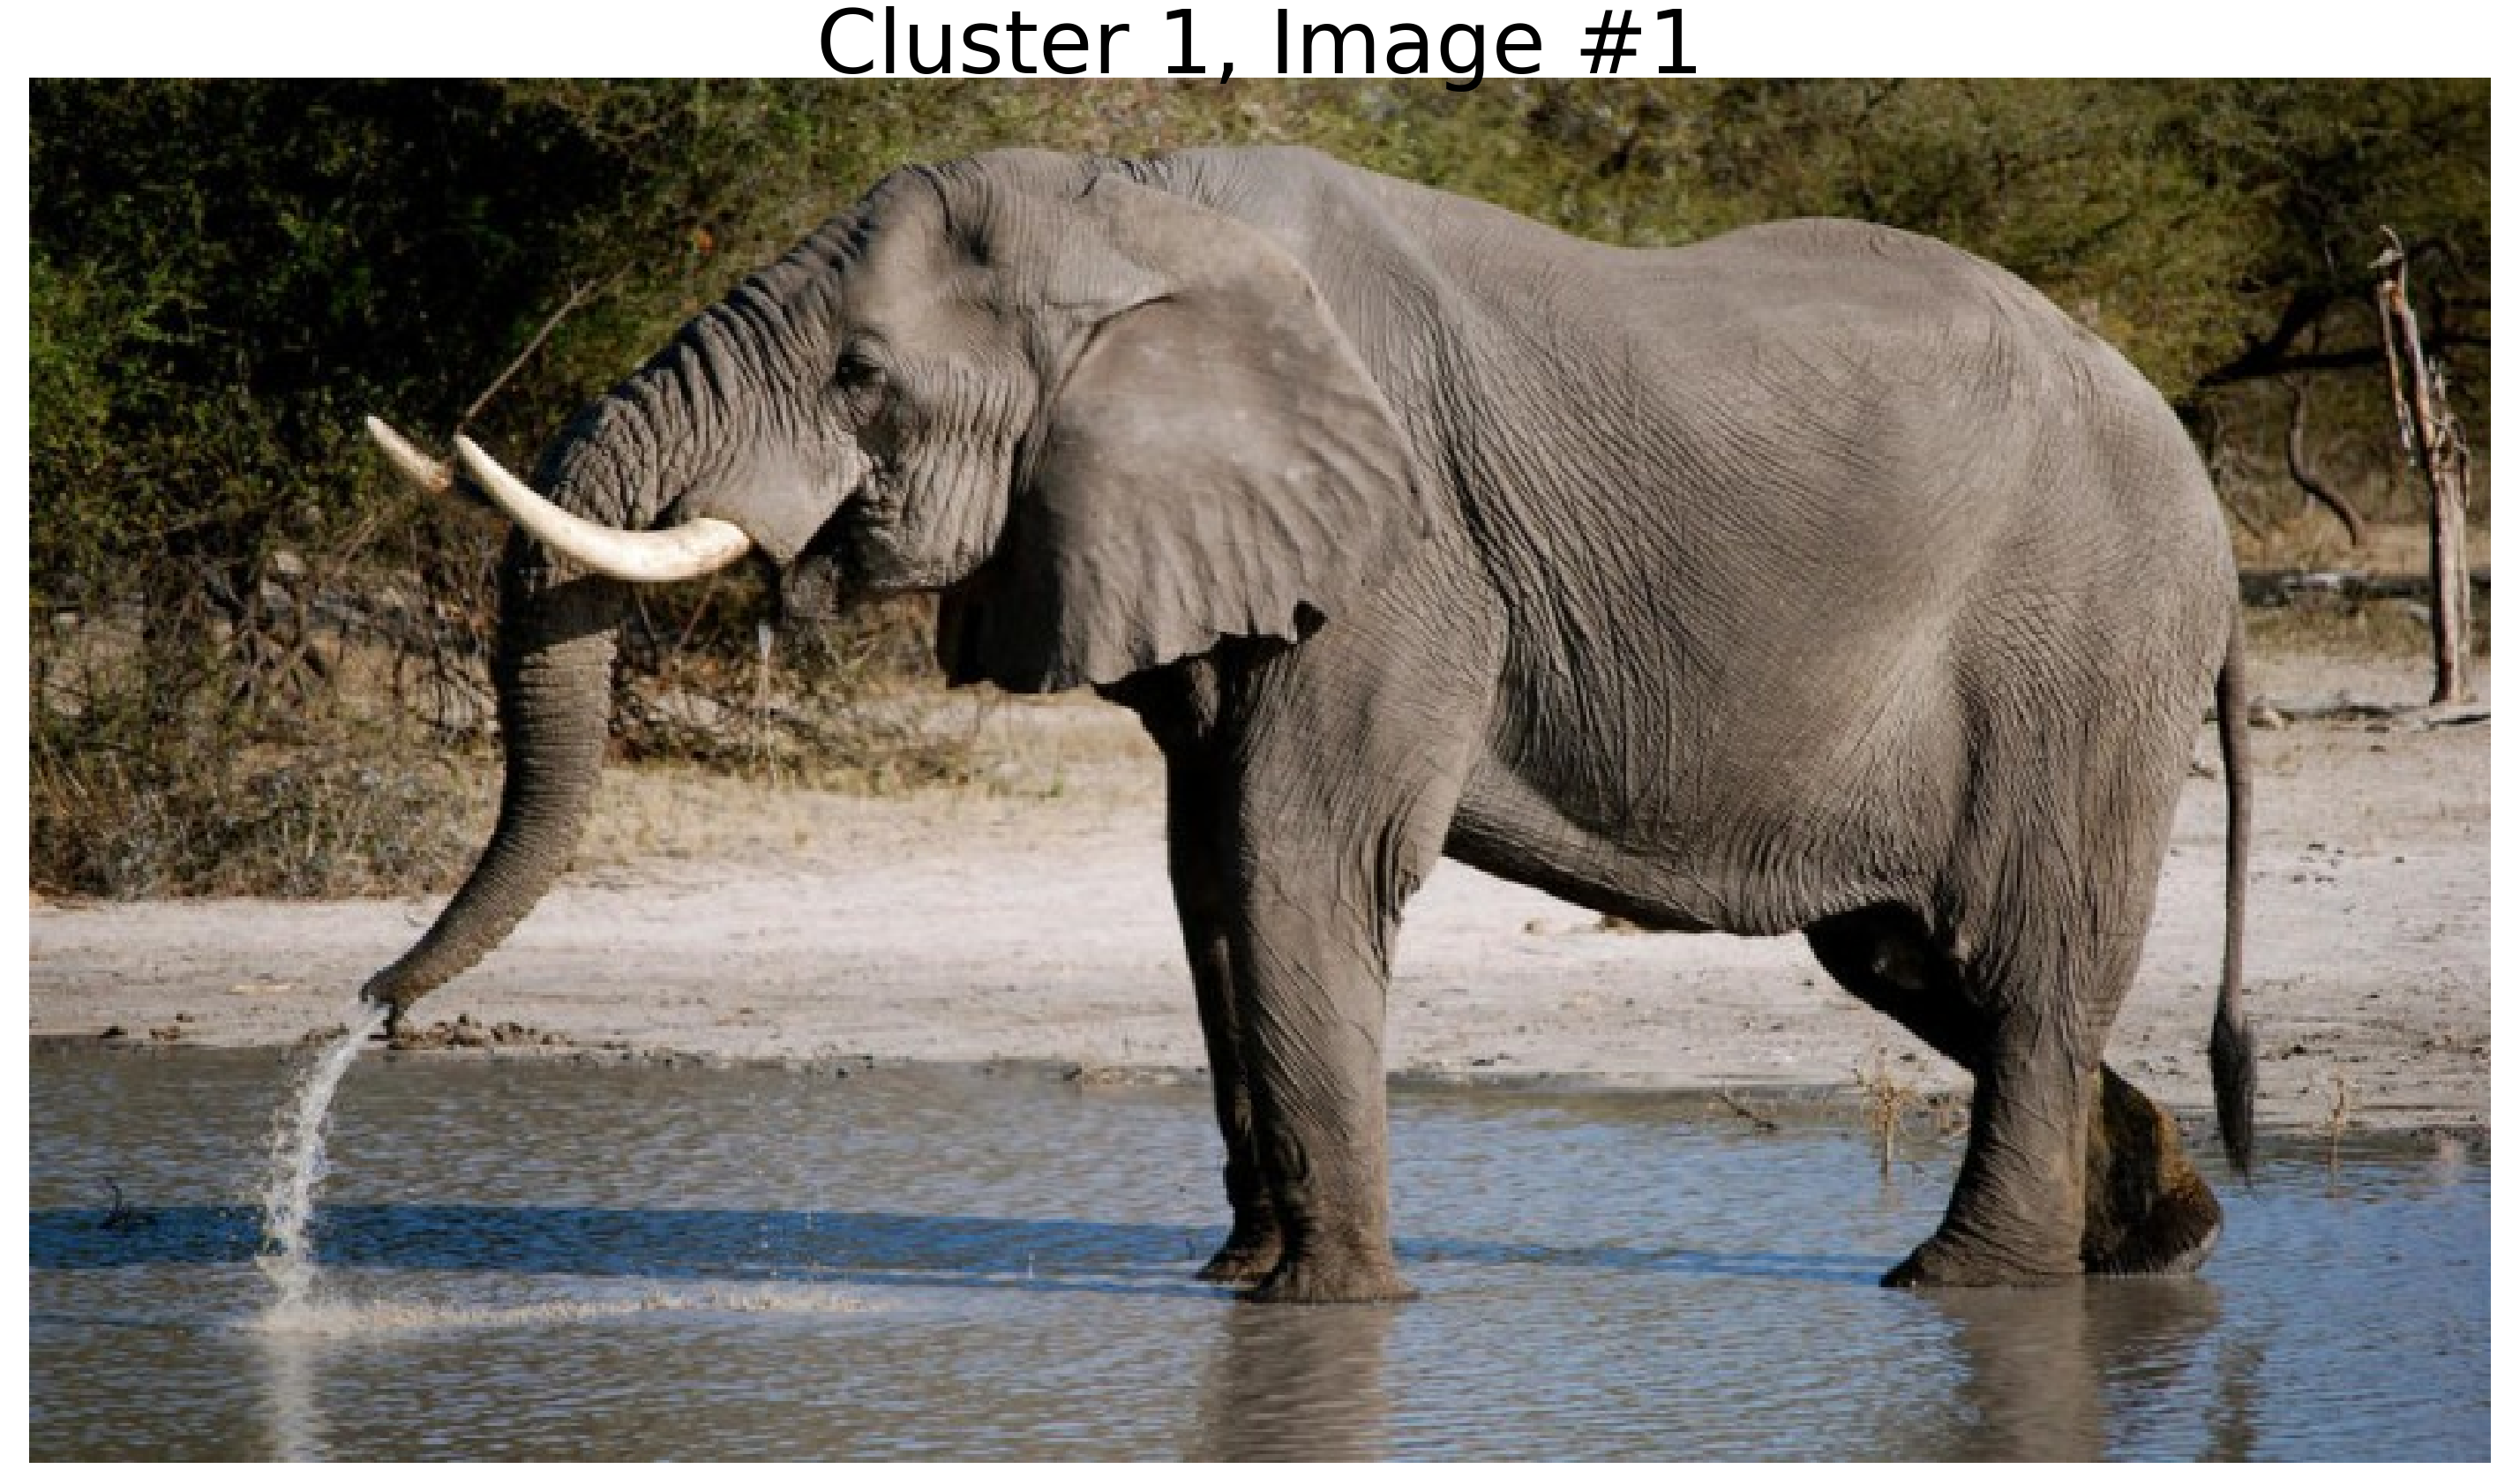

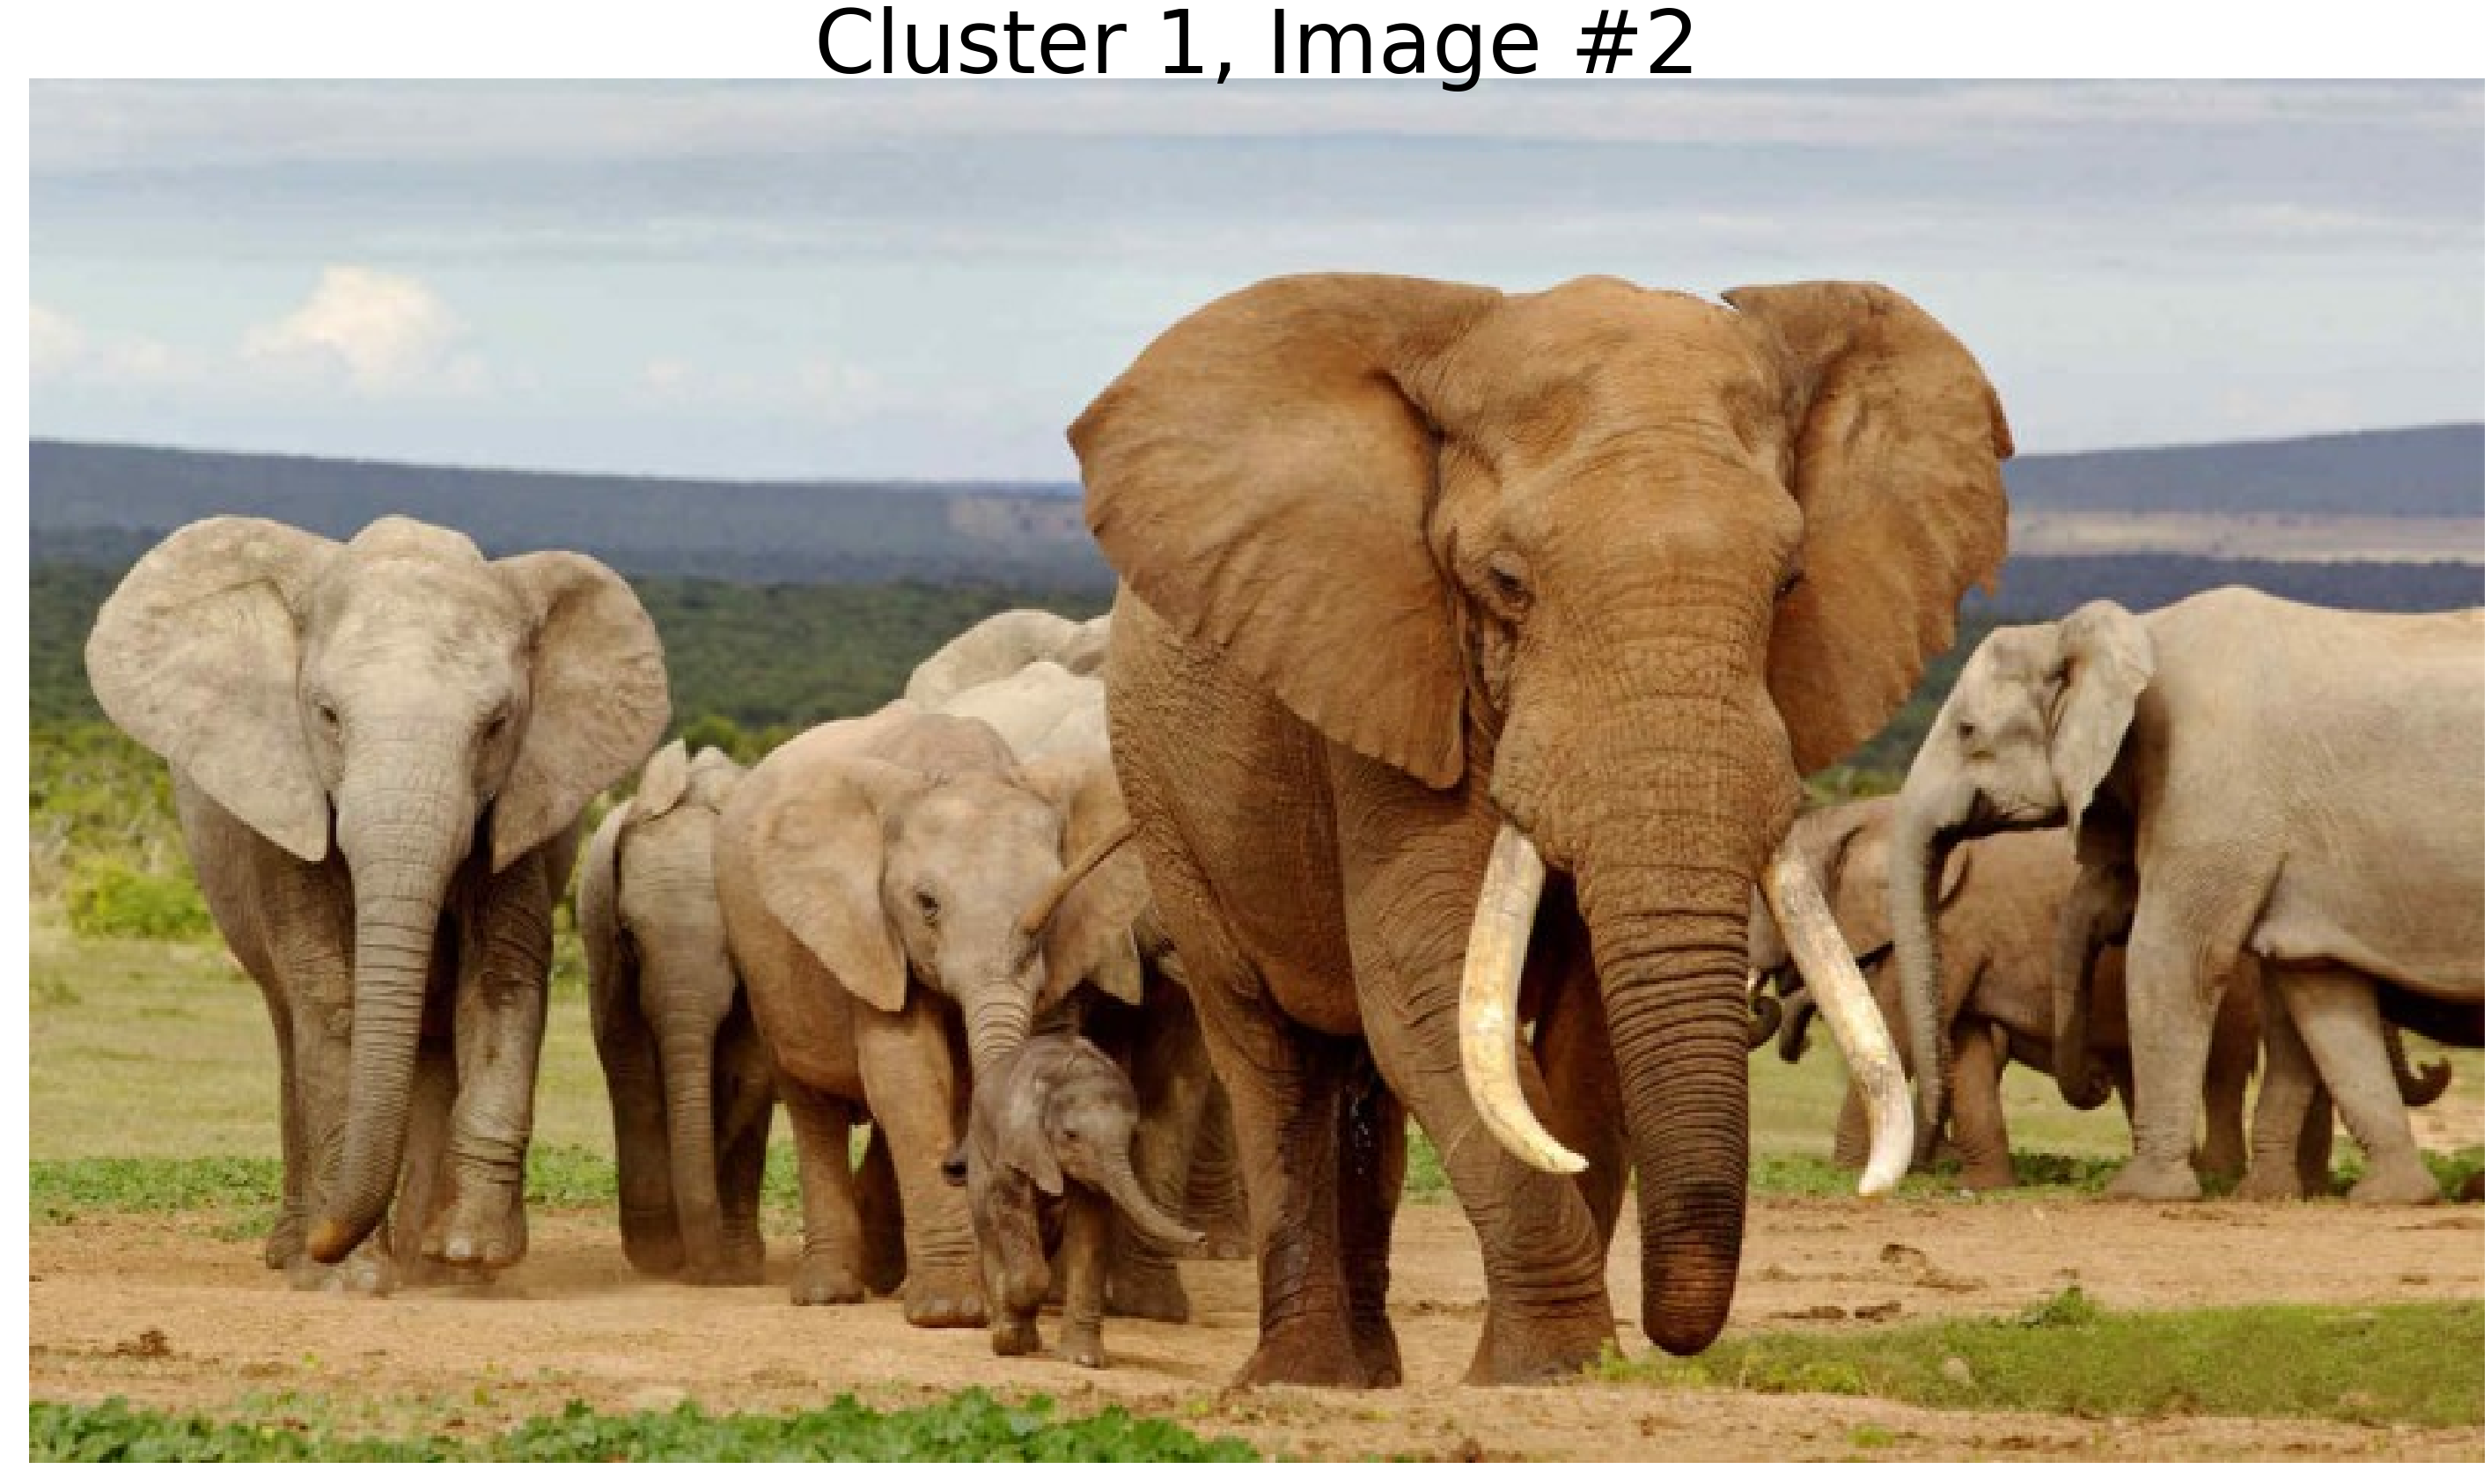

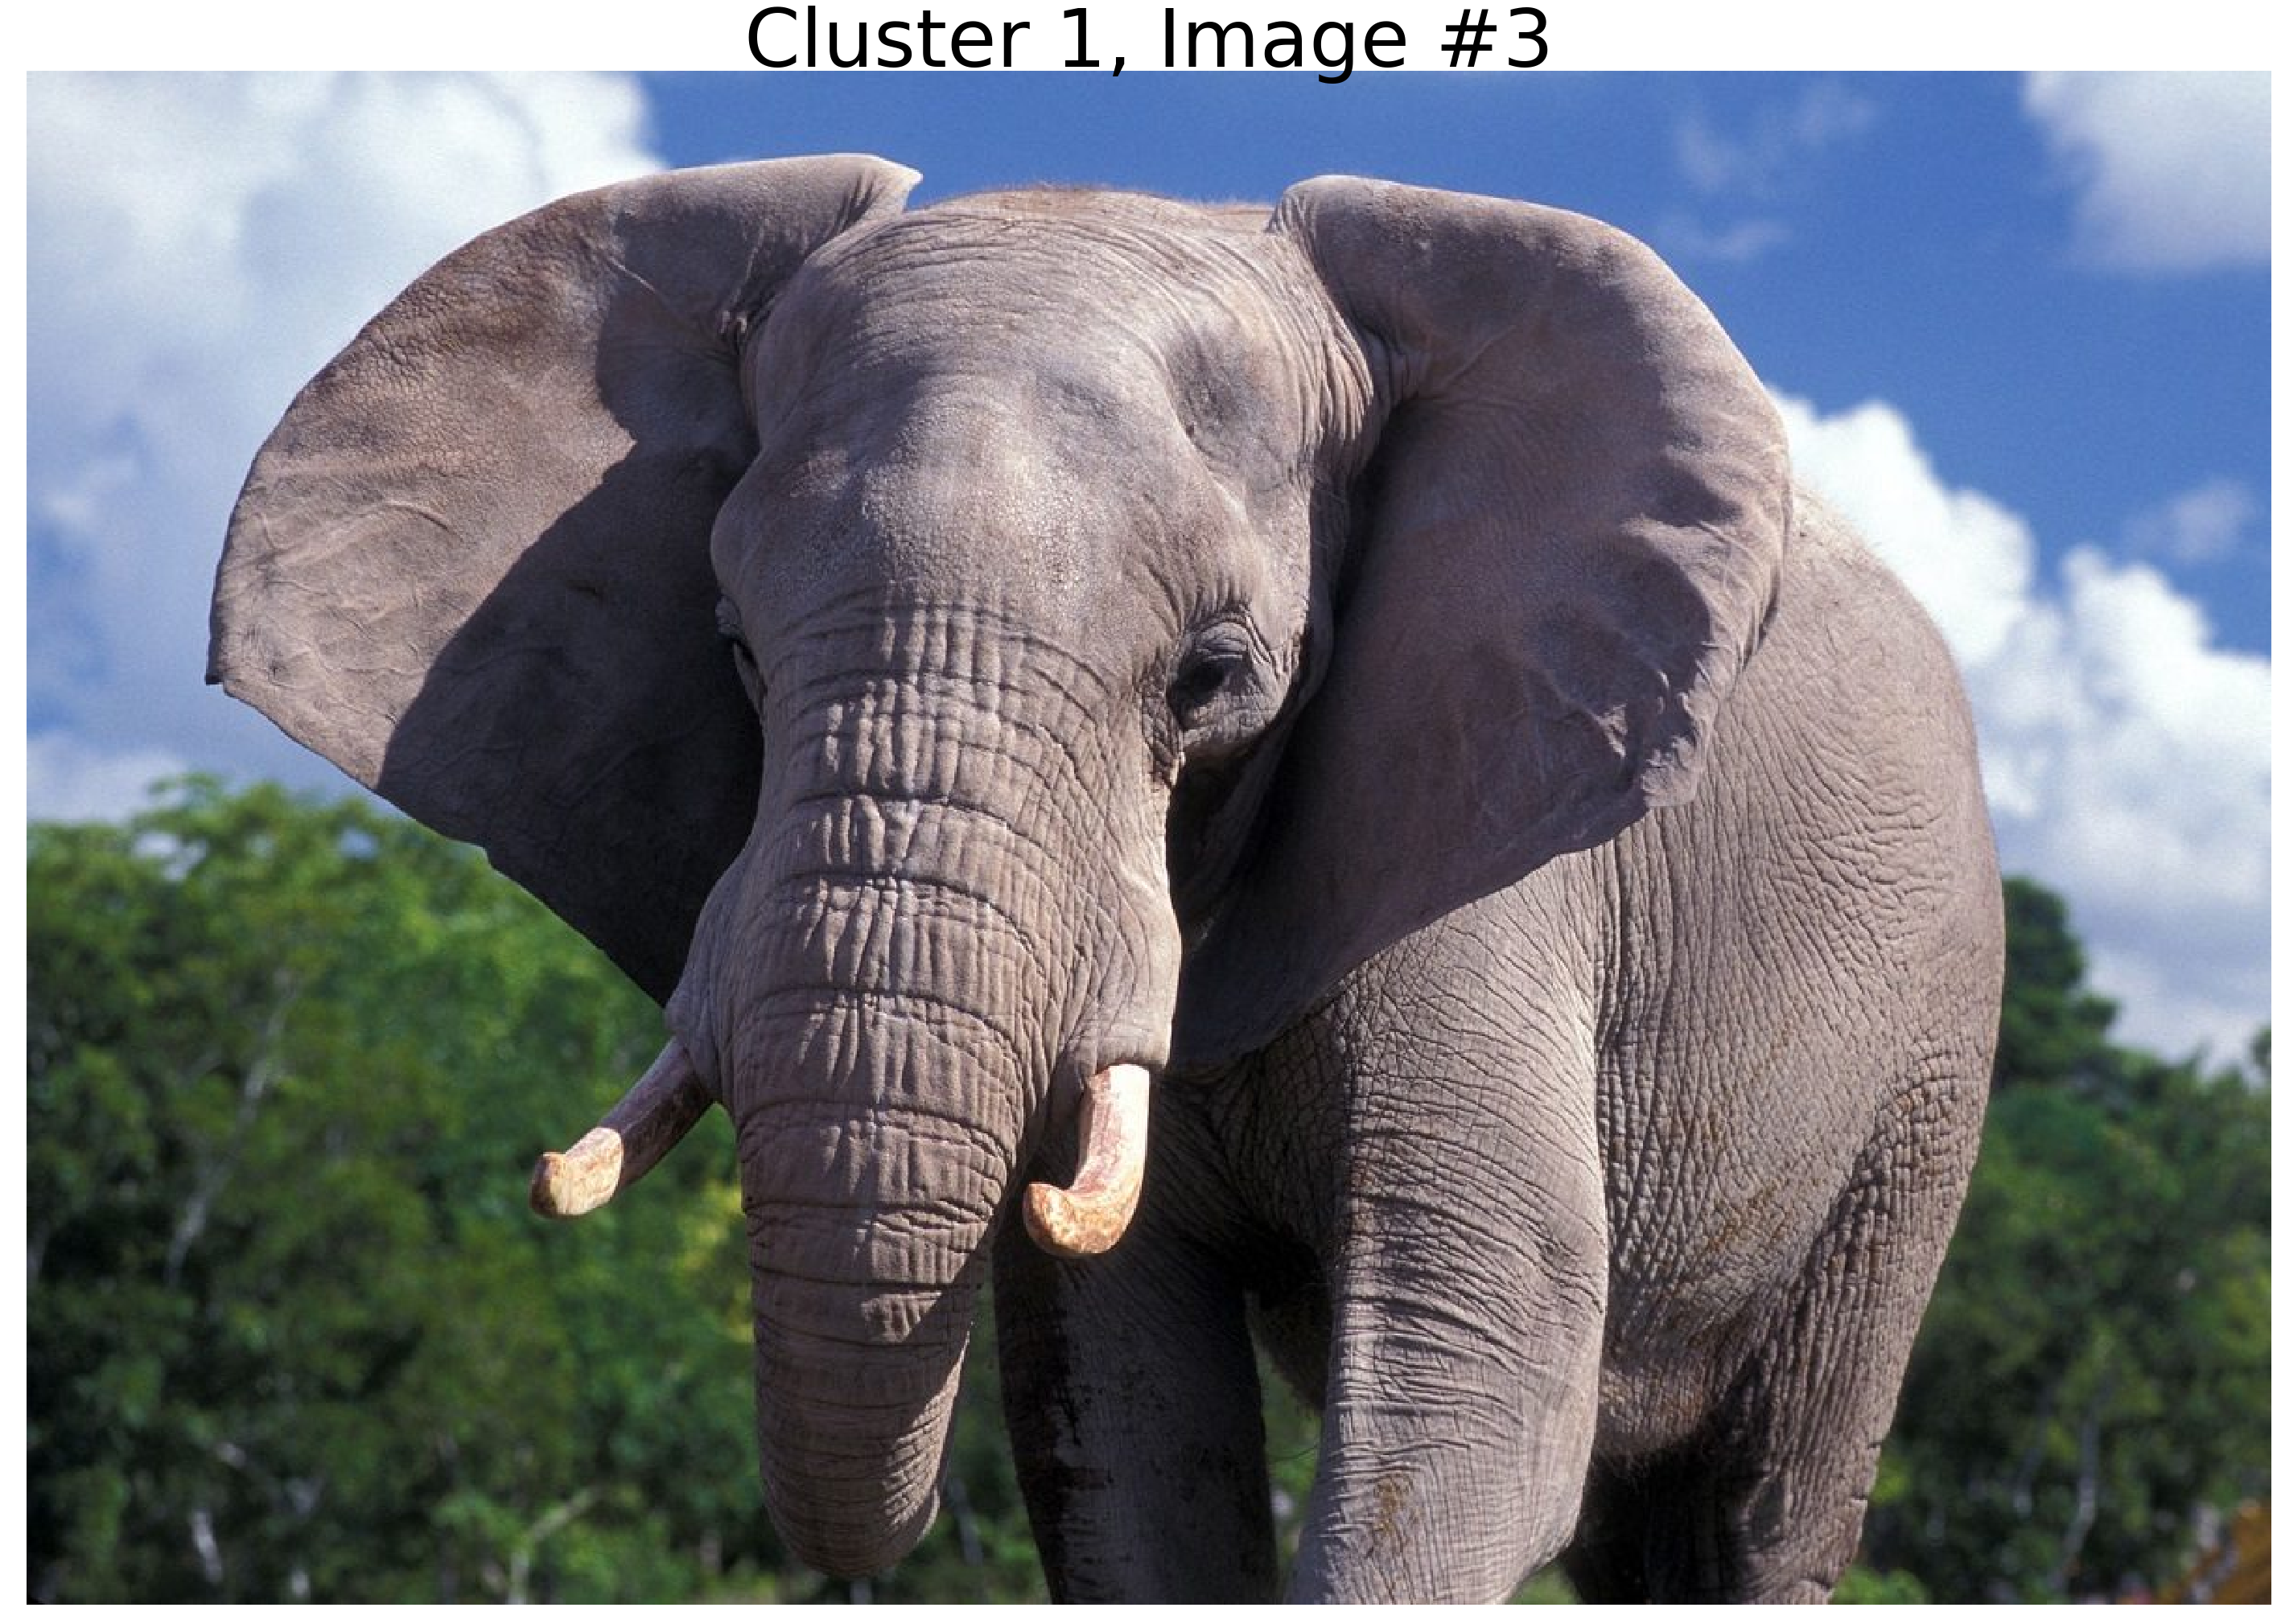

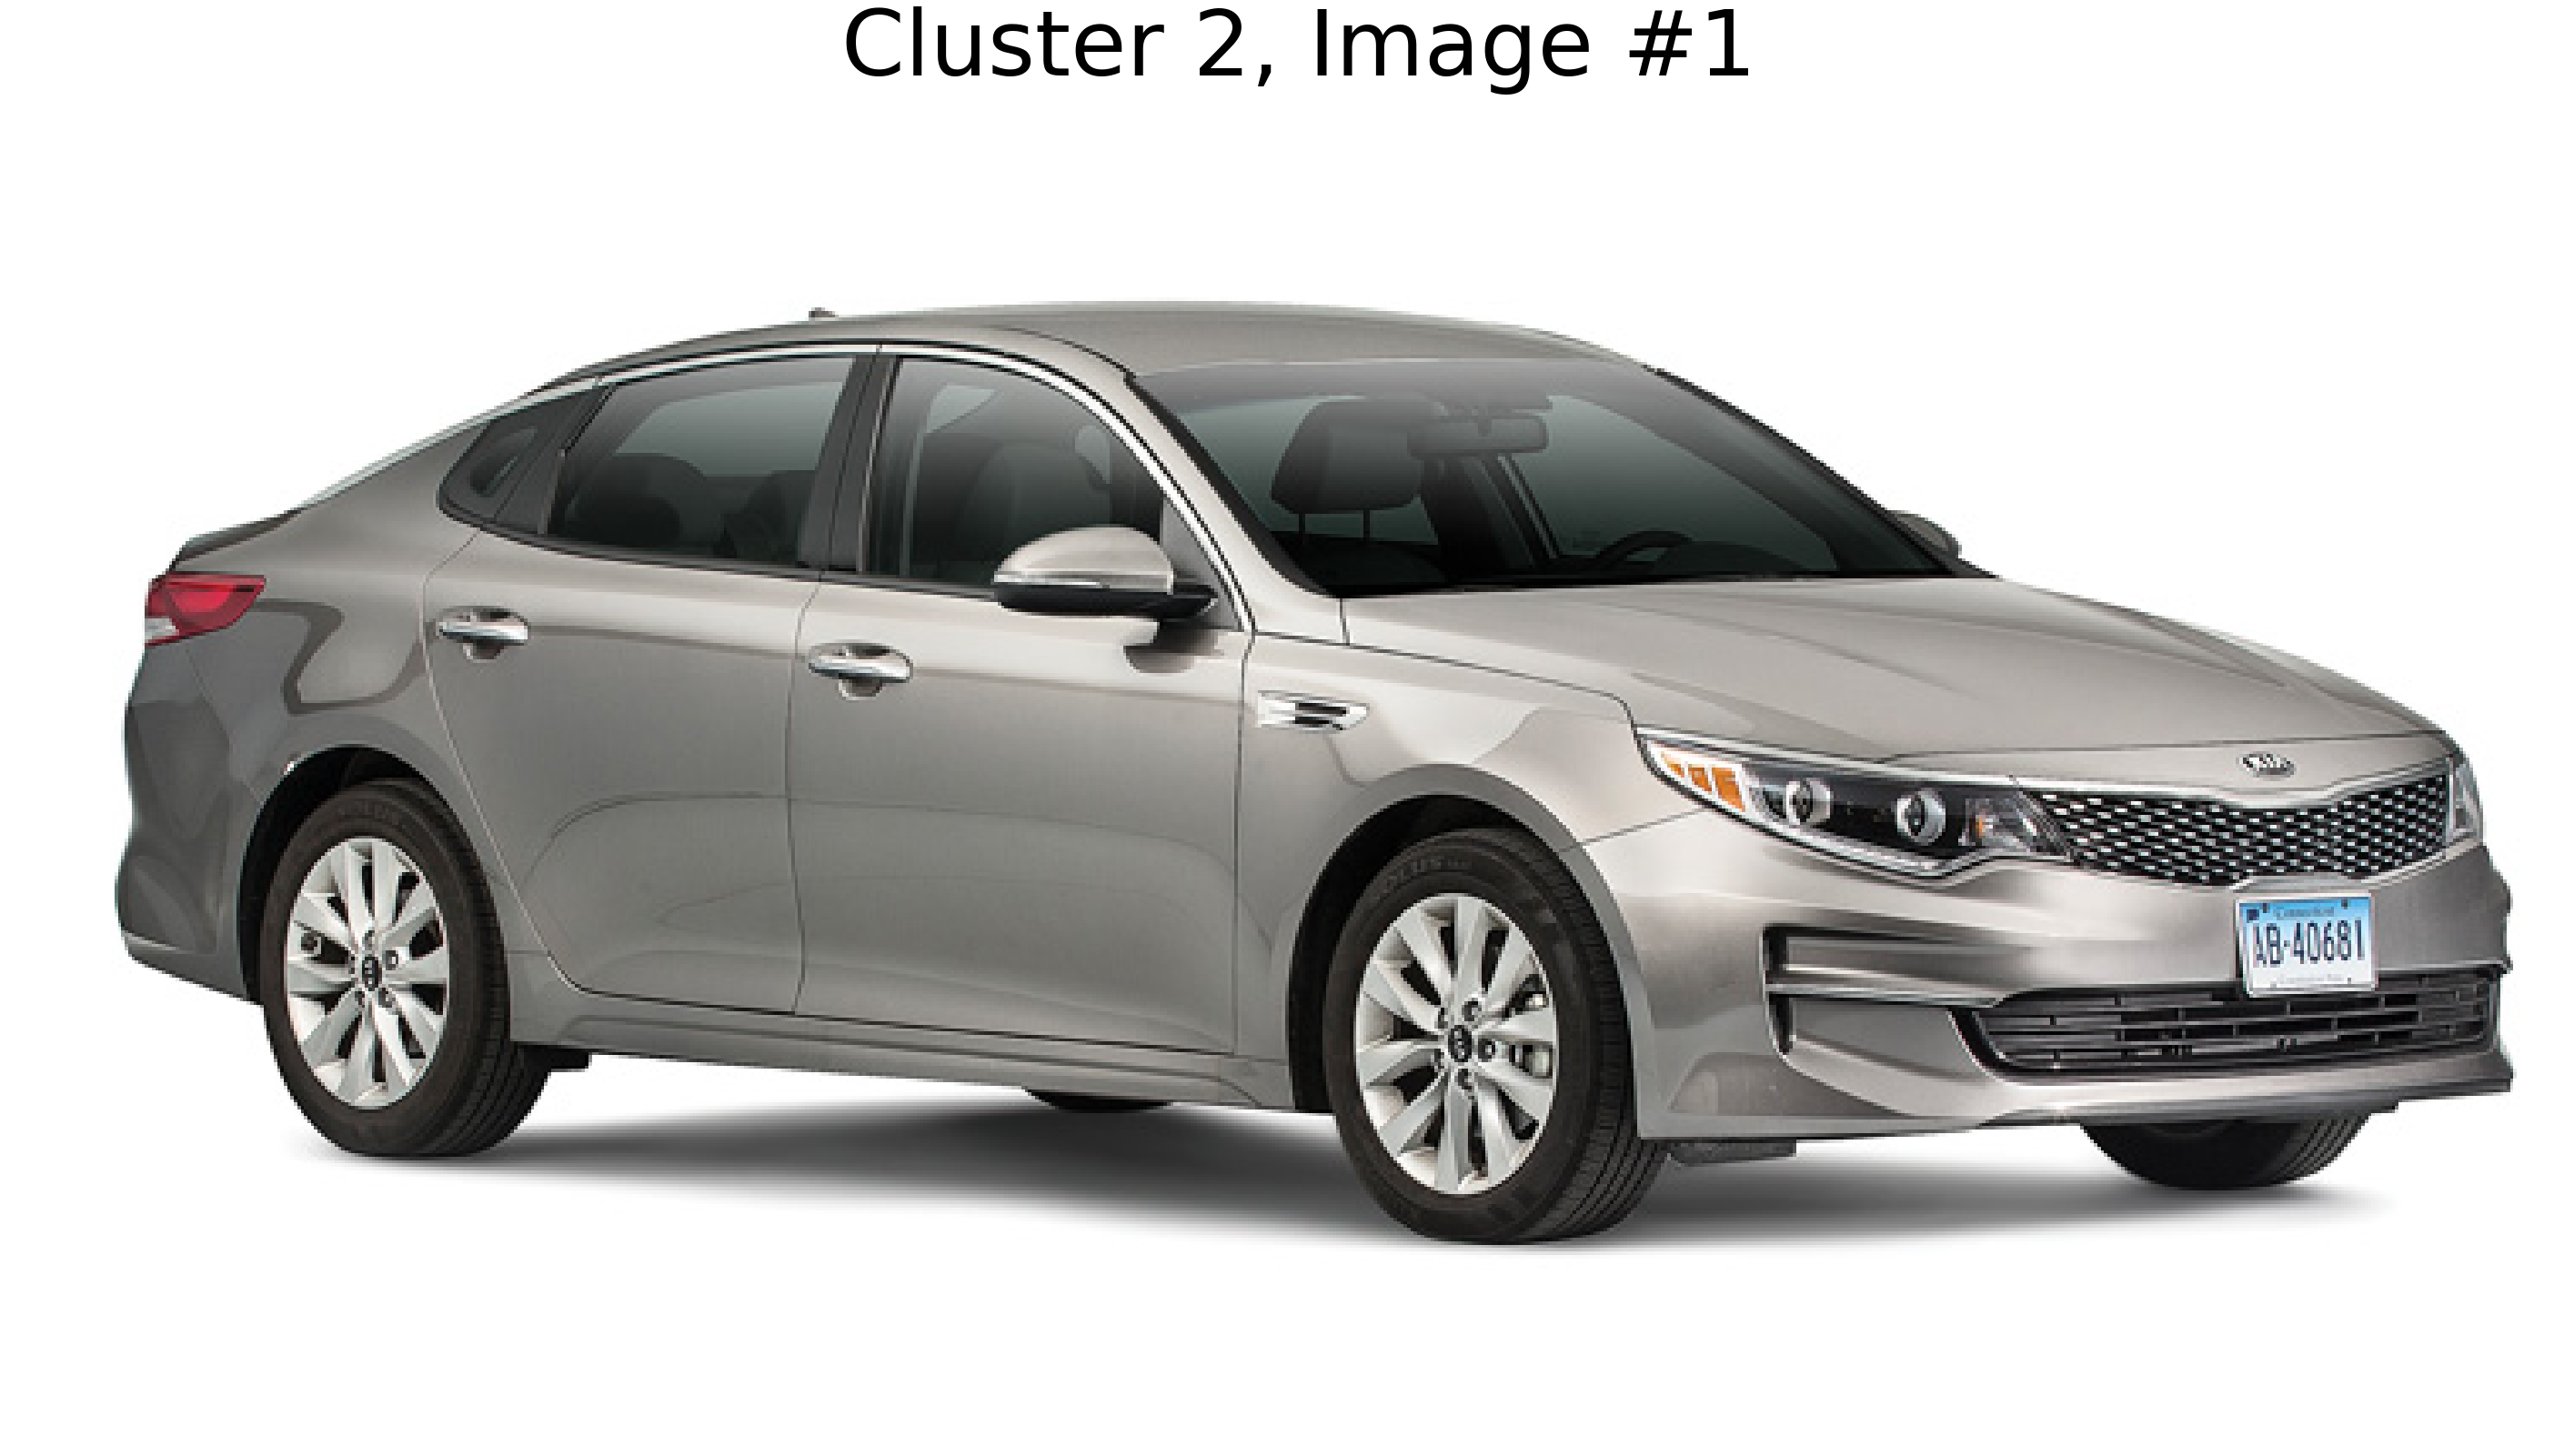

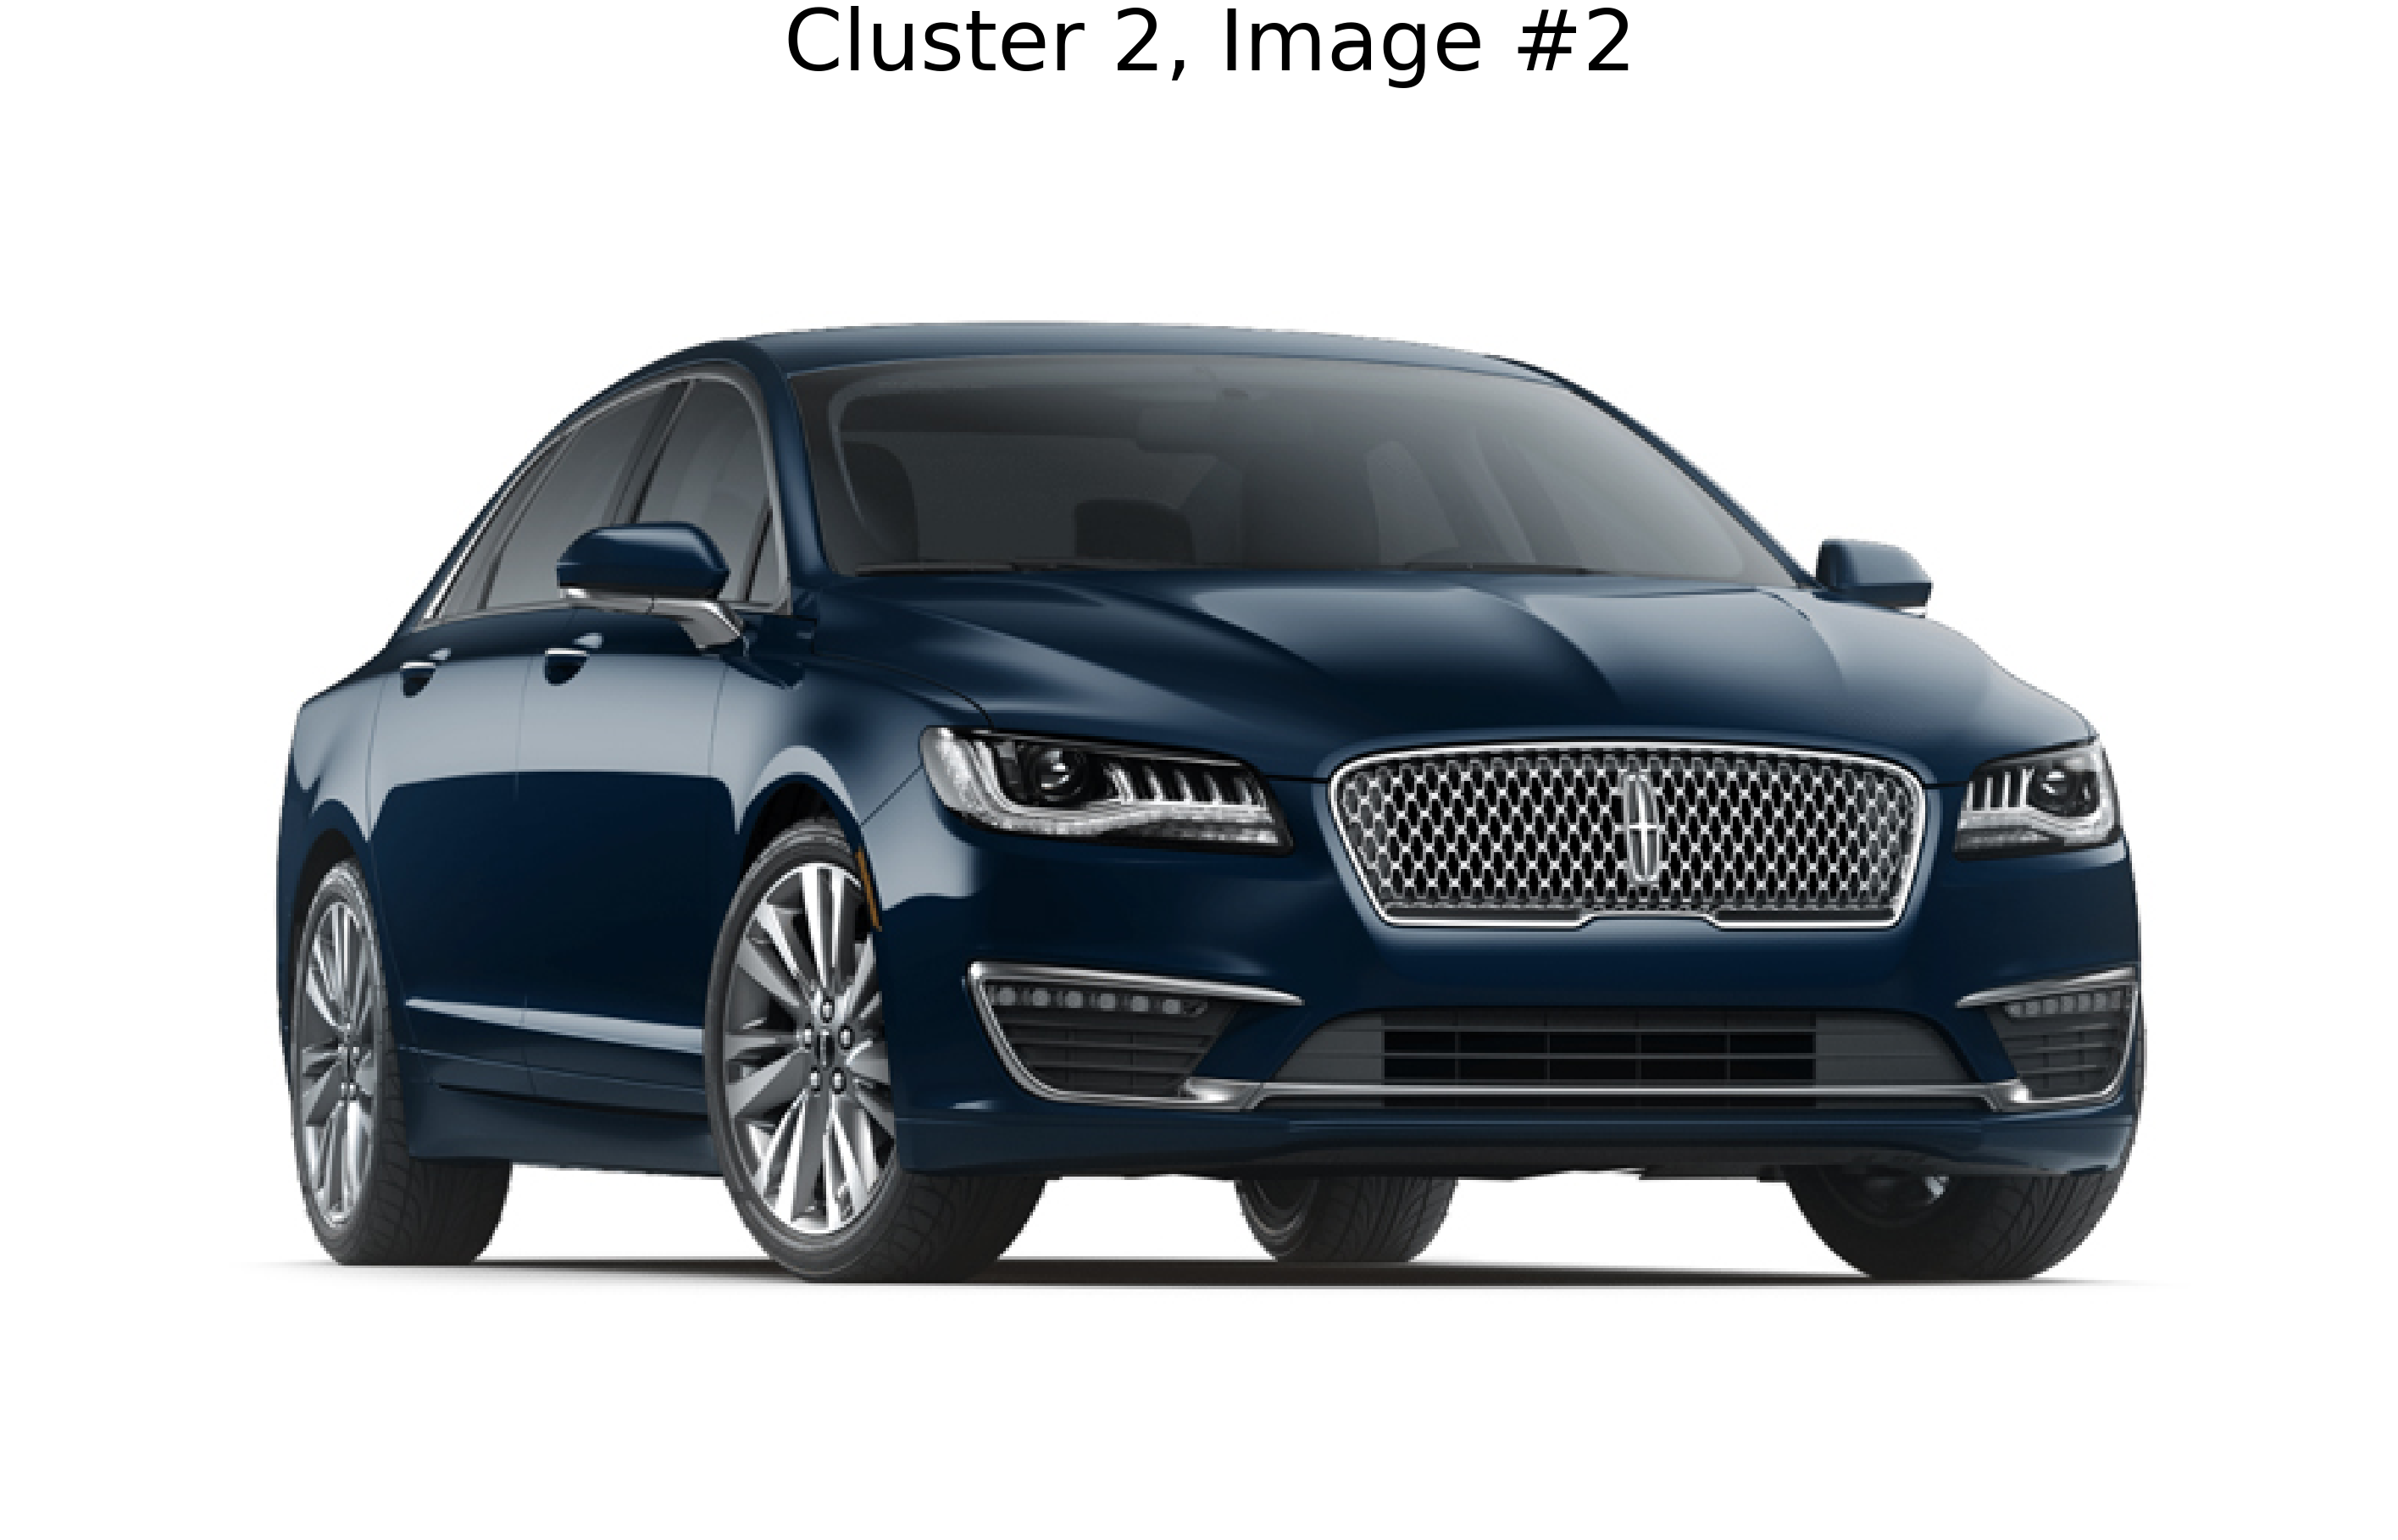

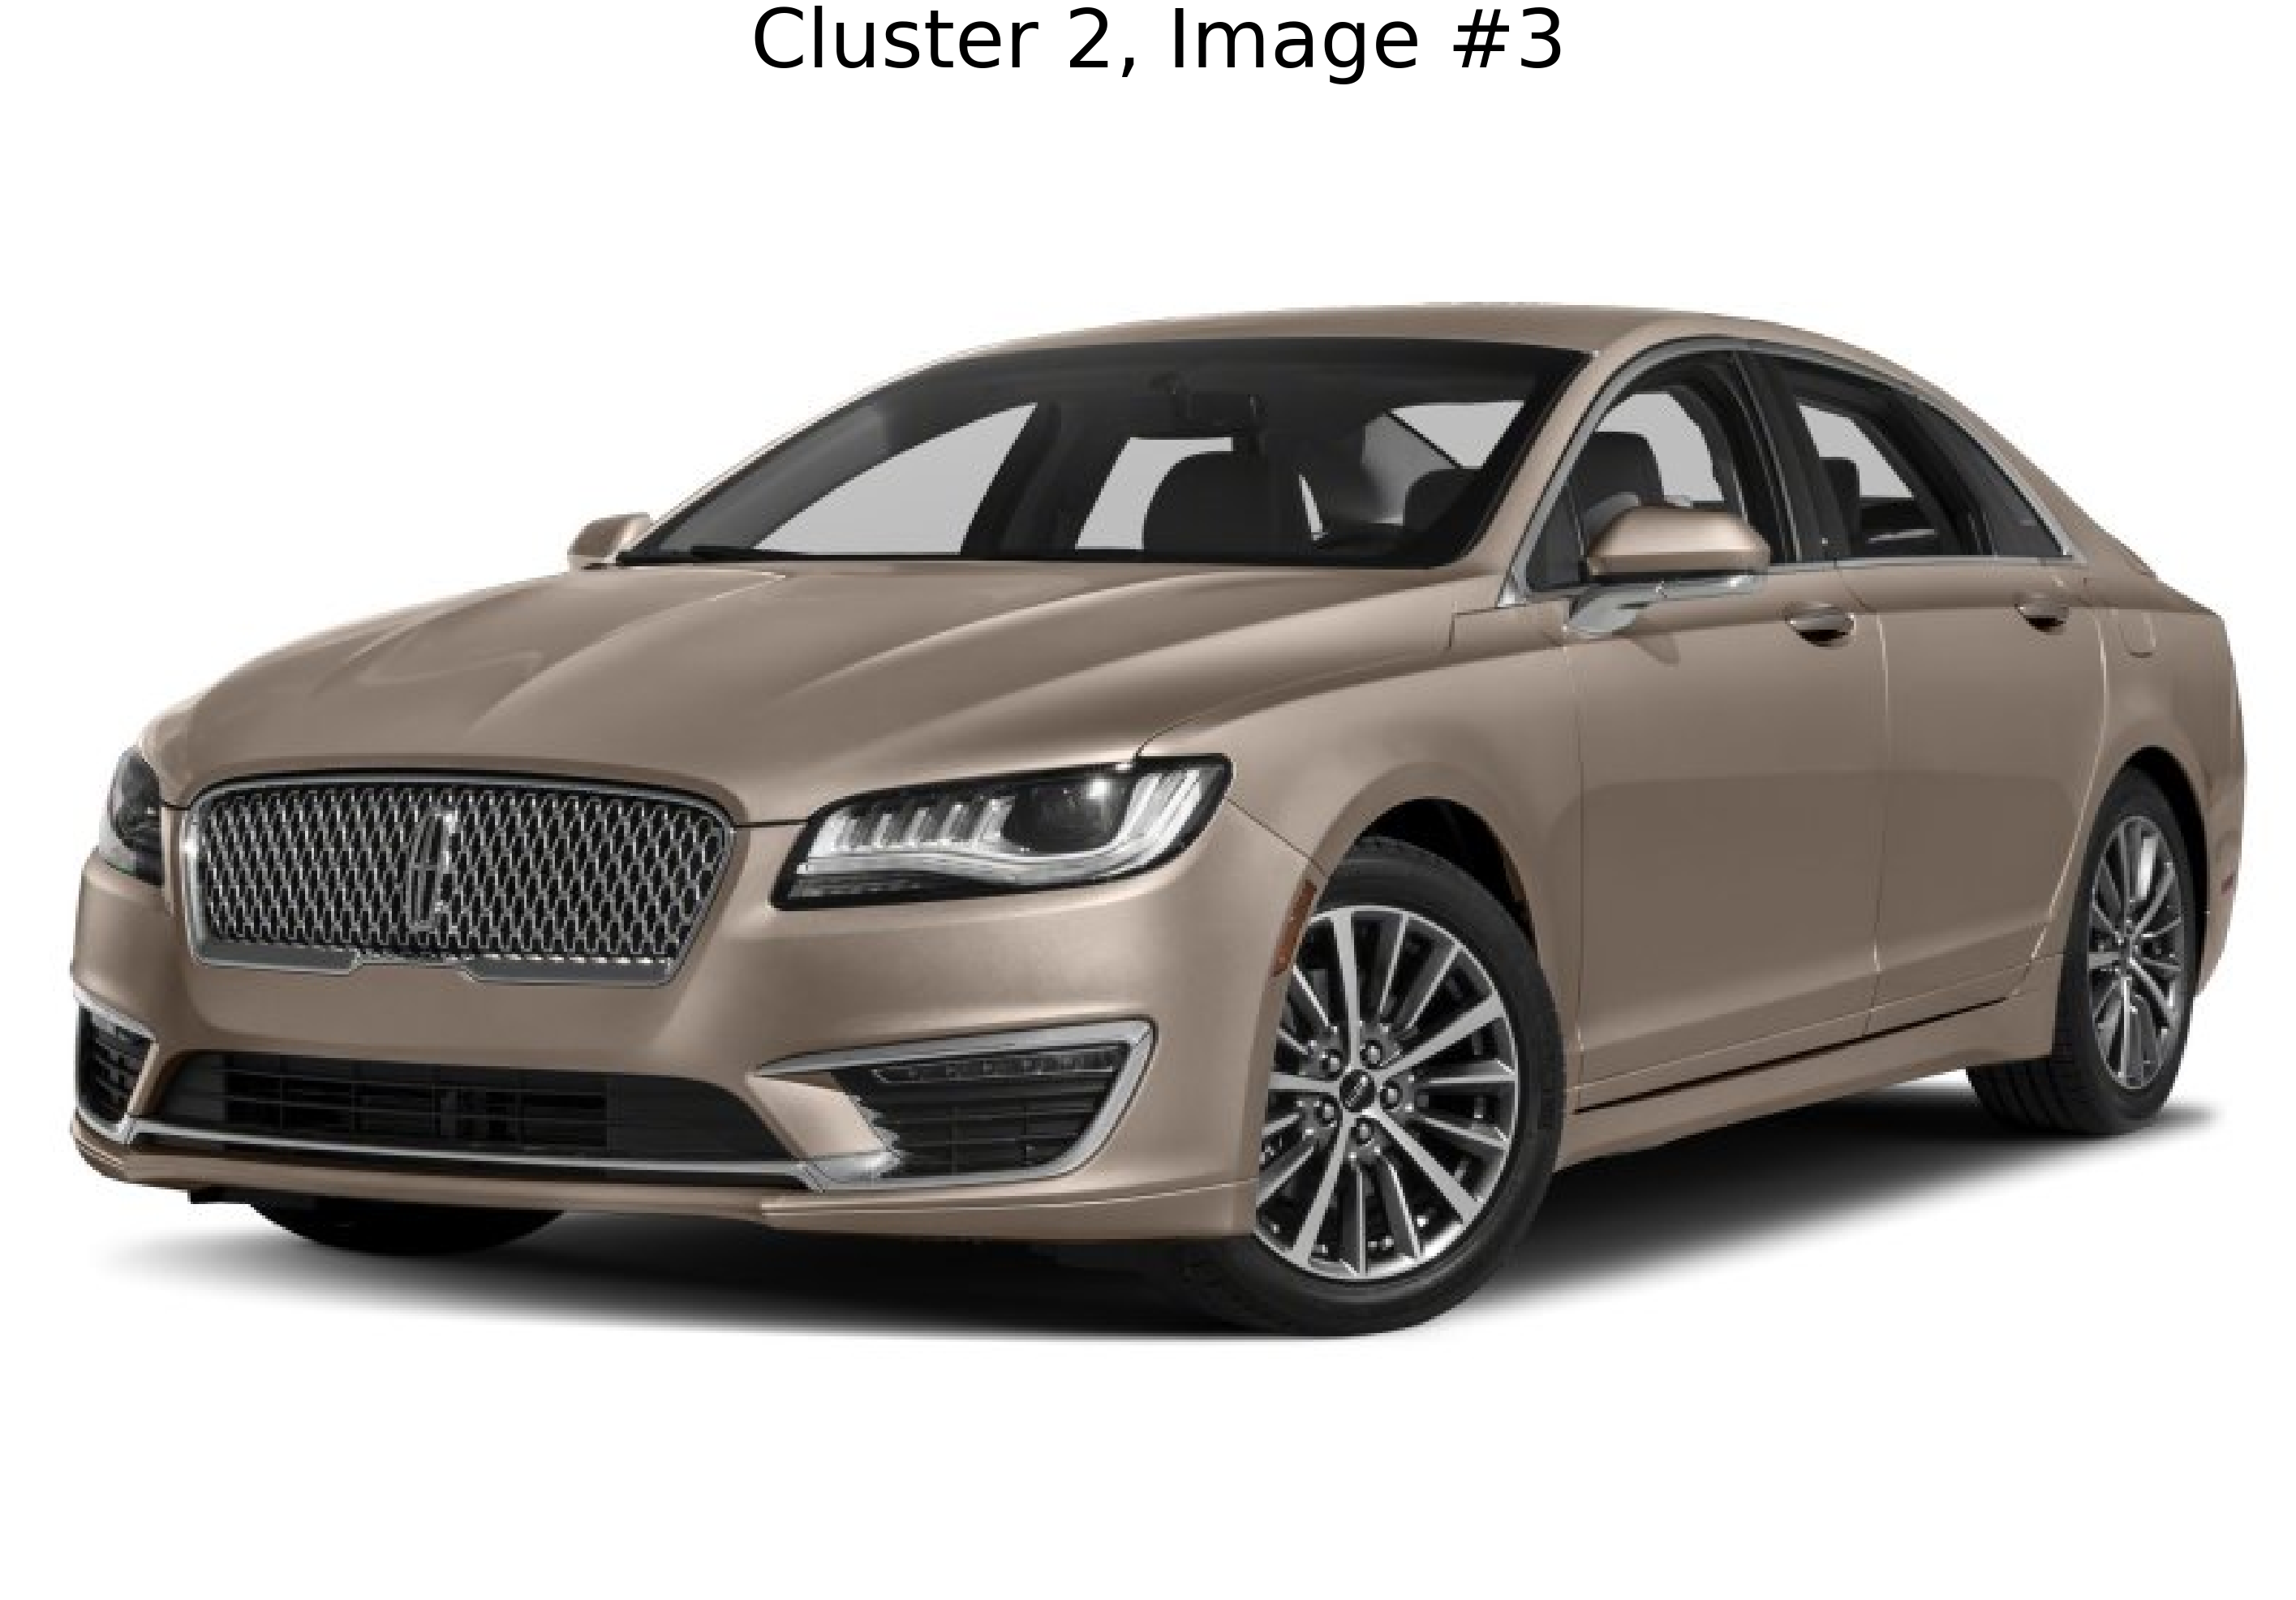

In [7]:
# Loop sobre os labels únicos
for label in np.unique(labels):
    # Obtém todos os caminhos de imagem atribuídos ao label atual
    labelPaths = imagePaths[np.where(labels == label)]

    # Loop sobre os caminhos da imagem que pertencem ao label atual
    for (i, path) in enumerate(labelPaths):
        # Carregar a imagem e exibi-la
        image = cv2.imread(path)
        show(image, "Cluster {}, Image #{}".format(label + 1, i + 1))